## Step 1 Import necessary python packages

In [2]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_theme(style="darkgrid")

## Step 2 Read in the data set and understand the data

In [4]:
df_ecommerce = pd.read_csv('https://c33ec964-077f-4f29-b852-b72083f299b7.filesusr.com/ugd/541b53_943685156d014341bf14530f7ed6c7d1.csv?dn=Ecommerce_marketing_campaign.csv')
df_ecommerce.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Create a new column named “Age” by calculating age using birth year.
df_ecommerce['Age'] = 2022 - df_ecommerce['Year_Birth']
df_ecommerce.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,3,11,0,41


In [4]:
# List features in the dataset
df_ecommerce.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntA', 'MntB', 'MntC', 'MntD',
       'MntE', 'MntF', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [6]:
df_ecommerce['Marital_Status'] = df_ecommerce['Marital_Status'].replace('Alone','Single')


In [7]:
df_ecommerce = df_ecommerce[(df_ecommerce['Marital_Status']!='Absurd')& (df_ecommerce['Marital_Status']!='YOLO')]


In [8]:
df_ecommerce = df_ecommerce[df_ecommerce['Education']!='Basic']

In [74]:
df_ecommerce[df_ecommerce['Education']=='Basic']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age


## Step 3 Exploratory data analysis(EDA)

In [9]:
# Exclude some extreme values
df_ecommerce = df_ecommerce[(df_ecommerce['Income']<120000) & (df_ecommerce['Age']<100)]

D:\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


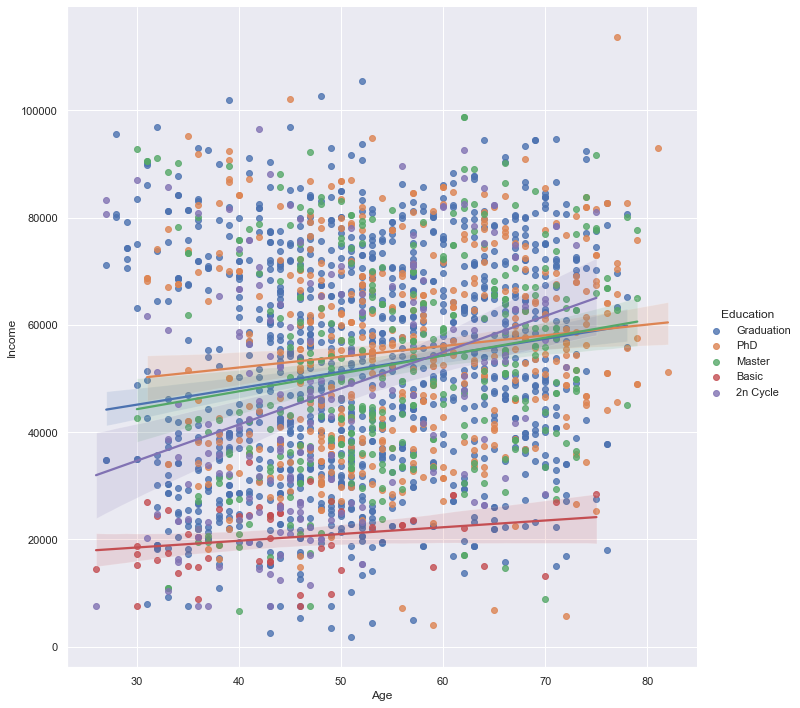

In [6]:
# Create a regression plot to show the relationship between “Age” and “Income”, for customers with different “Education”
sns.lmplot(x="Age", y="Income", hue="Education", data=df_ecommerce, size=10)

<AxesSubplot:xlabel='Education', ylabel='Response'>

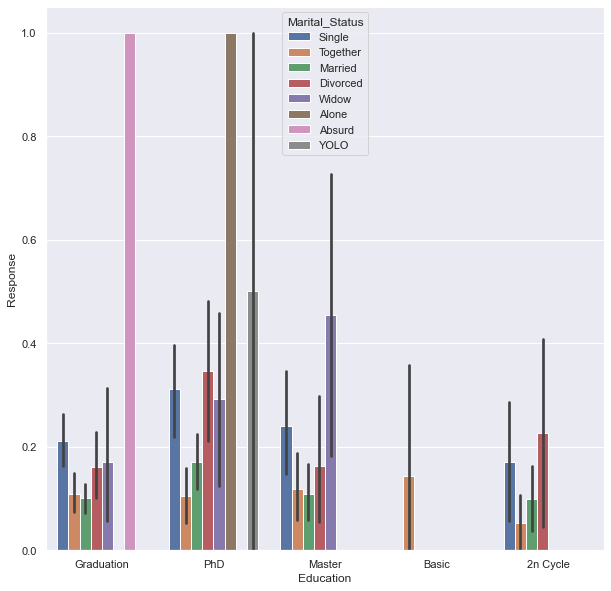

In [7]:
# Create a histogram that shows for people with different “Marital_Status” and break down by “Education”
sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(data=df_ecommerce, y='Response', hue='Marital_Status', x='Education')

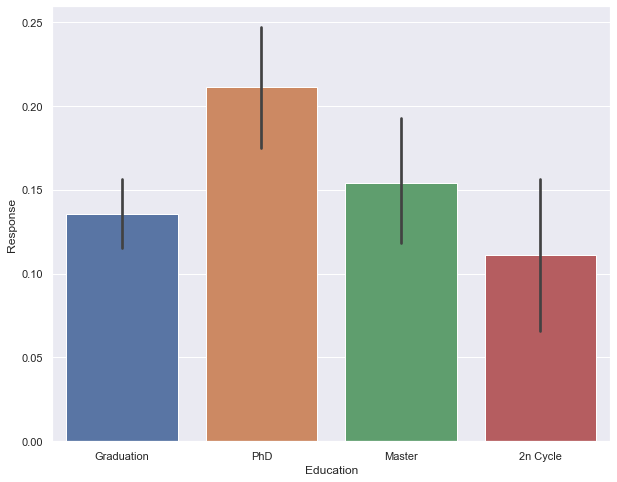

In [100]:
sns.barplot(data=df_ecommerce, y='Response',  x='Education')
sns.set(rc = {'figure.figsize':(10,8)})


In [15]:
df_ecommerce[(df_ecommerce['Marital_Status']=='YOLO')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2177,492,1973,PhD,YOLO,48432.0,0,1,10/18/2012,3,322,...,0,0,0,0,0,0,3,11,0,49
2202,11133,1973,PhD,YOLO,48432.0,0,1,10/18/2012,3,322,...,0,0,0,0,0,0,3,11,1,49


D:\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


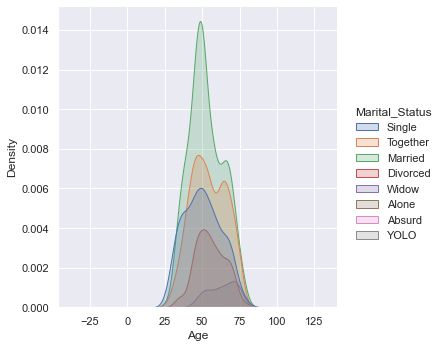

In [12]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.displot(data=df_ecommerce, x='Age', hue='Marital_Status', kind='kde', fill=True)

<AxesSubplot:xlabel='Education', ylabel='Response'>

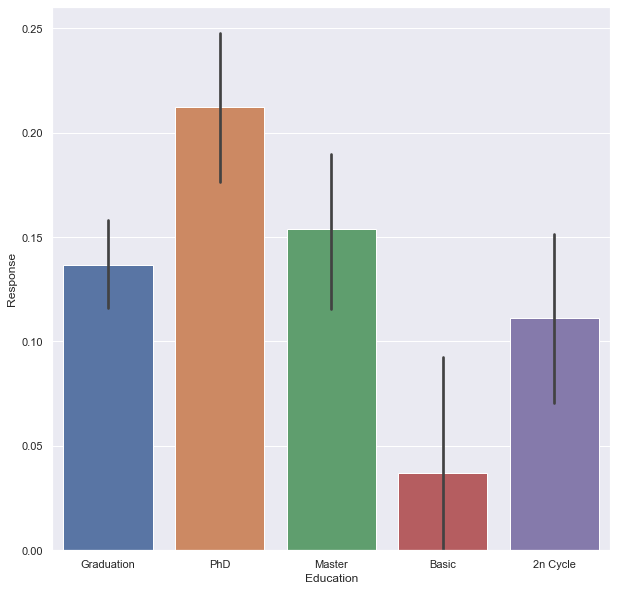

In [13]:
sns.barplot(data=df_ecommerce, y='Response', x='Education')

<AxesSubplot:xlabel='Marital_Status', ylabel='Response'>

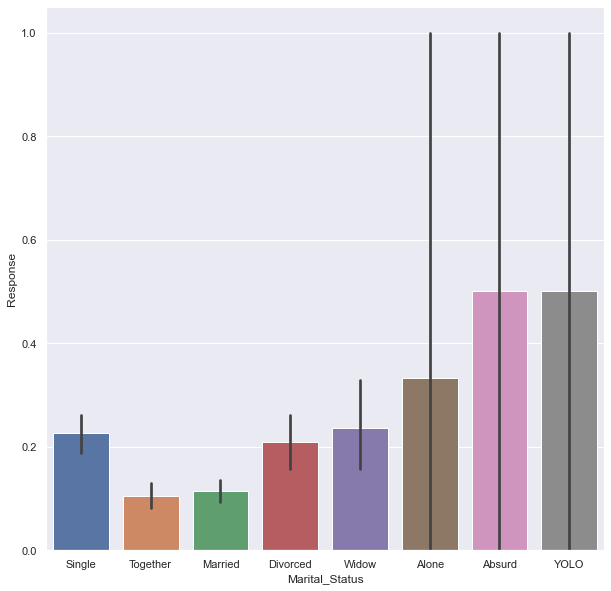

In [59]:
sns.barplot(data=df_ecommerce, y='Response', x='Marital_Status')

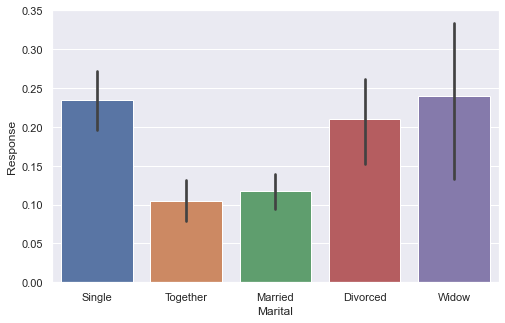

In [62]:
ecomm2 = sns.barplot(data=df_ecommerce, y='Response', x='Marital_Status')
sns.set(rc = {'figure.figsize':(10,8)})
ecomm2.set(xlabel ="Marital", ylabel = "Response")
plt.show()

<AxesSubplot:xlabel='Teenhome', ylabel='Response'>

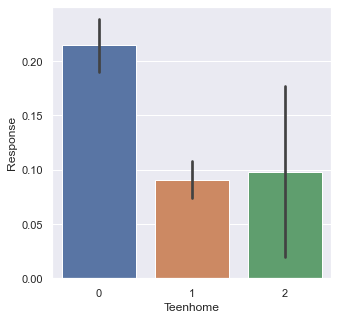

In [102]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(data=df_ecommerce, y='Response', x='Teenhome')

In [17]:
df_ecommerce.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntA                     int64
MntB                     int64
MntC                     int64
MntD                     int64
MntE                     int64
MntF                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
dtype: object

## Step 4 Machine learning model

### 4.1 Data preprocessing

In [10]:
# Drop columns that are not useful for modelling
df_modelling = df_ecommerce.drop(['ID','Year_Birth', 'Dt_Customer'],axis = 1)

In [11]:
# Use one hot coding to convert non-numerical features
df_modelling = pd.get_dummies(df_modelling)

In [12]:
# Display the columns after the coversion
df_modelling.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntA', 'MntB', 'MntC',
       'MntD', 'MntE', 'MntF', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Education_2n Cycle', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

In [13]:
# Display the first 5 rows
df_modelling.head().transpose()

,0,1,2,3,4
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0.0,1.0,0.0,1.0,1.0
Teenhome,0.0,1.0,0.0,0.0,0.0
Recency,58.0,38.0,26.0,26.0,94.0
MntA,635.0,11.0,426.0,11.0,173.0
MntB,88.0,1.0,49.0,4.0,43.0
MntC,546.0,6.0,127.0,20.0,118.0
MntD,172.0,2.0,111.0,10.0,46.0
MntE,88.0,1.0,21.0,3.0,27.0
MntF,88.0,6.0,42.0,5.0,15.0


In [14]:
# Check if a variable is null as the model will not run successfully if null value exists in columns
print(df_modelling.isnull().any())

Income                     False
Kidhome                    False
Teenhome                   False
Recency                    False
MntA                       False
MntB                       False
MntC                       False
MntD                       False
MntE                       False
MntF                       False
NumDealsPurchases          False
NumWebPurchases            False
NumCatalogPurchases        False
NumStorePurchases          False
NumWebVisitsMonth          False
AcceptedCmp3               False
AcceptedCmp4               False
AcceptedCmp5               False
AcceptedCmp1               False
AcceptedCmp2               False
Complain                   False
Z_CostContact              False
Z_Revenue                  False
Response                   False
Age                        False
Education_2n Cycle         False
Education_Graduation       False
Education_Master           False
Education_PhD              False
Marital_Status_Divorced    False
Marital_St

In [15]:
# Select the rows with null values
df_modelling[df_modelling['Income'].isnull()]

,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,MntE,MntF,...,Age,Education_2n Cycle,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow


In [16]:
X = df_modelling.drop('Response', axis=1)
y = df_modelling['Response']

In [17]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,MntE,MntF,...,Age,Education_2n Cycle,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,65,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,68,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,57,0,1,0,0,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,38,0,1,0,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,41,0,0,0,1,0,1,0,0,0


In [18]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Use 70% of data as the training set and the remaining 30% as the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
# Count the number of training set
X_train['Age'].count()

1502

In [22]:
# Count the number of test set
X_test['Age'].count()

645

### 4.2 Build machine learning models

In [23]:
# Use random forest to build the model that predicts the customer response
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Define the model to be used for training
clf = RandomForestClassifier(max_depth=4)

In [25]:
# Check the null value again
print(X_train.isnull().any())

Income                     False
Kidhome                    False
Teenhome                   False
Recency                    False
MntA                       False
MntB                       False
MntC                       False
MntD                       False
MntE                       False
MntF                       False
NumDealsPurchases          False
NumWebPurchases            False
NumCatalogPurchases        False
NumStorePurchases          False
NumWebVisitsMonth          False
AcceptedCmp3               False
AcceptedCmp4               False
AcceptedCmp5               False
AcceptedCmp1               False
AcceptedCmp2               False
Complain                   False
Z_CostContact              False
Z_Revenue                  False
Age                        False
Education_2n Cycle         False
Education_Graduation       False
Education_Master           False
Education_PhD              False
Marital_Status_Divorced    False
Marital_Status_Married     False
Marital_St

In [26]:
X_train.head()

,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,MntE,MntF,...,Age,Education_2n Cycle,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
385,10245.0,1,0,32,4,7,7,6,4,13,...,51,0,1,0,0,0,0,1,0,0
536,44931.0,0,1,0,78,0,11,0,0,7,...,55,0,1,0,0,0,0,0,1,0
1373,50611.0,0,1,98,459,0,24,6,0,4,...,62,0,0,0,1,1,0,0,0,0
1909,31535.0,1,0,95,15,4,13,0,0,19,...,42,0,0,1,0,0,1,0,0,0
2227,57967.0,0,1,39,229,7,137,4,0,91,...,60,0,1,0,0,0,0,1,0,0


### 4.3 Make prediction on test dataset and test the model performance

In [27]:
# Input the training features and label to train the model
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [28]:
y_predict = clf.predict(X_test)

In [29]:
# Import necessary packages to evaluate the quality of a model’s predictions
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_curve, auc

In [30]:
accuracy_score(y_test, y_predict)

0.8635658914728682

In [31]:
precision_score(y_test, y_predict)

0.9375

In [32]:
confusion_matrix(y_test, y_predict)

array([[542,   1],
       [ 87,  15]], dtype=int64)

In [33]:
y_prob = clf.predict_proba(X_test)

In [34]:
y_prob[0:5]

array([[0.92391144, 0.07608856],
       [0.93925781, 0.06074219],
       [0.90190713, 0.09809287],
       [0.93271854, 0.06728146],
       [0.90549368, 0.09450632]])

In [36]:
# AUC score
y = y_test
pred = y_prob[:,1]
fpr, tpr,thresholds = roc_curve(y, pred)
auc(fpr, tpr)

0.8604520998086159

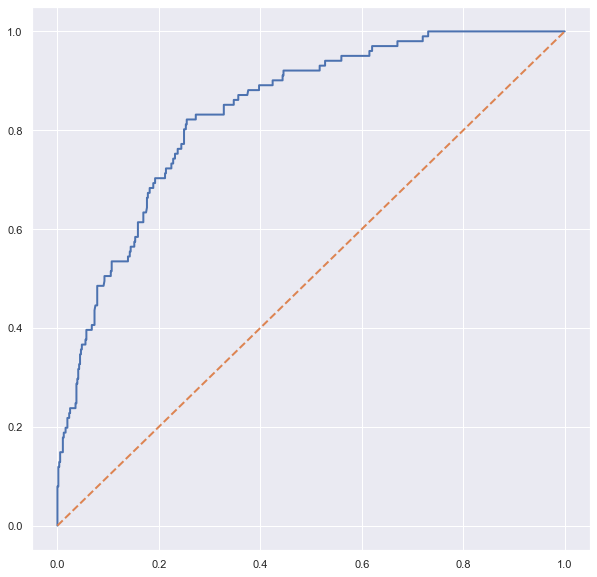

In [46]:
# Plot the ROC curve
plt.plot(fpr, tpr, lw=2)
bplt.plot([0,1],[0,1], lw=2, linestyle='--')

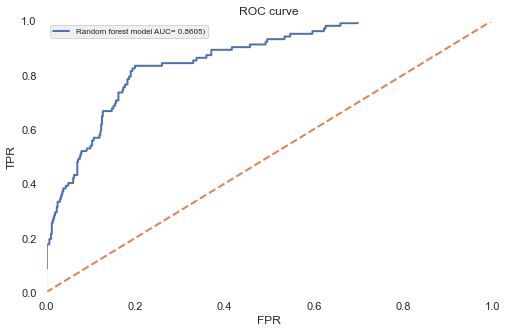

In [181]:
fig, ax = plt.subplots()
ax.set_facecolor('white')

plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.legend(["Random forest model AUC= {:.4f})".format(auc(fpr, tpr))],fontsize=8, loc=2)
plt.show()

In [47]:
# Create an empty DataFrame
df_roc = pd.DataFrame()

# Write an automatic program for parameter tuning 
# Use a for loop to change the random forest max_depth parameter from 3 to 15 
for k in range(3, 16):
    clf = RandomForestClassifier(max_depth=k)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)
    y = y_test
    pred = y_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y, pred)
    df_roc = df_roc.append(pd.DataFrame({'Max_depth':[k], 'ROC':auc(fpr, tpr)}), ignore_index=True)
    # Store the output as a dictionary and print the AUC for different max_depth.
    d={'Max_depth':k,'ROC':auc(fpr, tpr)}
    print(d)

{'Max_depth': 3, 'ROC': 0.8247648294241188}
{'Max_depth': 4, 'ROC': 0.8381426377931911}
{'Max_depth': 5, 'ROC': 0.8504615167399093}
{'Max_depth': 6, 'ROC': 0.8559679497361501}
{'Max_depth': 7, 'ROC': 0.8667866786678667}
{'Max_depth': 8, 'ROC': 0.8682162333880448}
{'Max_depth': 9, 'ROC': 0.8729108204938141}
{'Max_depth': 10, 'ROC': 0.8700340622297524}
{'Max_depth': 11, 'ROC': 0.8636098904008047}
{'Max_depth': 12, 'ROC': 0.8652159333580417}
{'Max_depth': 13, 'ROC': 0.8693016360459576}
{'Max_depth': 14, 'ROC': 0.8654453680662183}
{'Max_depth': 15, 'ROC': 0.8686309807451333}


In [48]:
# Display the first 5 rows
df_roc.head()

,Max_depth,ROC
0,3,0.824765
1,4,0.838143
2,5,0.850462
3,6,0.855968
4,7,0.866787


<AxesSubplot:xlabel='Max_depth', ylabel='ROC'>

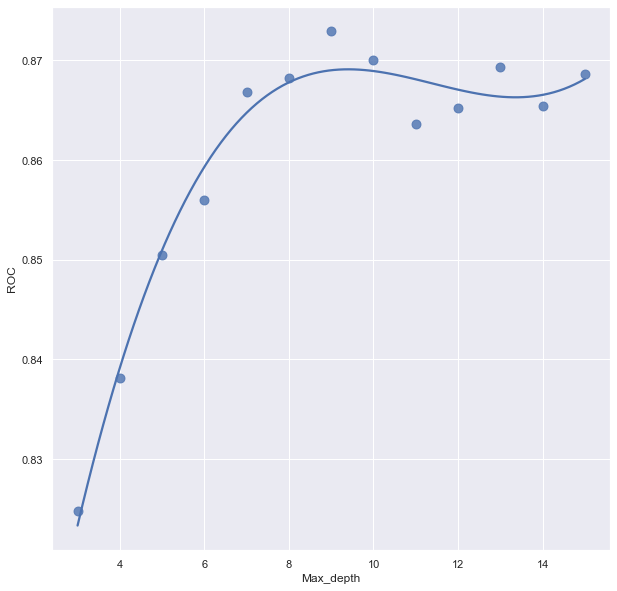

In [49]:
# Plot a figure where the x axis is max_depth and y-axis is AUC.
sns.regplot(x="Max_depth", y="ROC", data=df_roc, order=3, ci=None, scatter_kws={"s": 80})

In [54]:
df_roc[(df_roc['ROC']>0.87)]

,Max_depth,ROC
6,9,0.872911
7,10,0.870034


In [103]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average='weighted') 

0.8483205976471707

In [39]:
df_report = pd.DataFrame(classification_report(y_test, y_predict))
df_report

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       543
           1       0.94      0.15      0.25       102

    accuracy                           0.86       645
   macro avg       0.90      0.57      0.59       645
weighted avg       0.87      0.86      0.82       645



In [180]:
def classification_report(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
report = classification_report(y_test, y_predict)
report

TypeError: classification_report() takes 1 positional argument but 2 were given

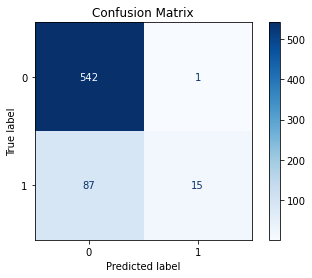

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [55]:
df_new = df_ecommerce
df_new['Income_bins'] = pd.cut(x=df_new['Income'], bins=[0, 19999, 39999, 59999, 79999, 113734], labels=['0-19999','20000-39999','40000-39999','60000-79999','>=80000'])
df_new

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,income_bins,Income_bins
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,3,11,1,65,40000-39999,40000-39999
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,3,11,0,68,40000-39999,40000-39999
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,3,11,0,57,60000-79999,60000-79999
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,3,11,0,38,20000-39999,20000-39999
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,3,11,0,41,40000-39999,40000-39999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,...,0,0,0,0,3,11,0,55,60000-79999,60000-79999
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,...,0,1,0,0,3,11,0,76,60000-79999,60000-79999
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,...,0,0,0,0,3,11,0,41,40000-39999,40000-39999
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,...,0,0,0,0,3,11,0,66,60000-79999,60000-79999


In [54]:
#df_new.drop(columns = ['income_bins'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,...,0,0,0,0,0,0,3,11,0,55
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,...,0,0,0,1,0,0,3,11,0,76
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,...,0,1,0,0,0,0,3,11,0,41
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,...,0,0,0,0,0,0,3,11,0,66


In [49]:
df_ecommerce['Income'].max()

113734.0

In [56]:
df_new['Income_bins'].value_counts()

40000-39999    640
60000-79999    622
20000-39999    574
>=80000        208
0-19999        103
Name: Income_bins, dtype: int64

<AxesSubplot:xlabel='Income_bins', ylabel='Response'>

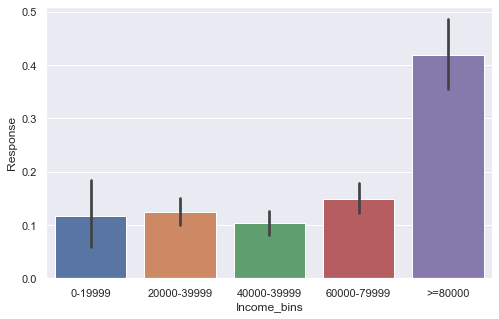

In [60]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(data=df_new, y='Response', x='Income_bins')

In [64]:
df_new['Marital_Status'].value_counts()

Marital_Status
Married           834
Together          554
Single            455
Divorced          229
Widow              75
dtype: int64

In [67]:
df_new['Marital_Status'] = df_new['Marital_Status'].replace(['With_Partner'],'Without Partner')
df_new['Marital_Status'] = df_new['Marital_Status'].replace(['Without_Partner' ],'With Partner')
df_new

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,income_bins,Income_bins
0,5524,1957,Graduation,Without Partner,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,3,11,1,65,40000-39999,40000-39999
1,2174,1954,Graduation,Without Partner,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,3,11,0,68,40000-39999,40000-39999
2,4141,1965,Graduation,With Partner,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,3,11,0,57,60000-79999,60000-79999
3,6182,1984,Graduation,With Partner,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,3,11,0,38,20000-39999,20000-39999
4,5324,1981,PhD,With Partner,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,3,11,0,41,40000-39999,40000-39999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,With Partner,61223.0,0,1,6/13/2013,46,709,...,0,0,0,0,3,11,0,55,60000-79999,60000-79999
2236,4001,1946,PhD,With Partner,64014.0,2,1,6/10/2014,56,406,...,0,1,0,0,3,11,0,76,60000-79999,60000-79999
2237,7270,1981,Graduation,Without Partner,56981.0,0,0,1/25/2014,91,908,...,0,0,0,0,3,11,0,41,40000-39999,40000-39999
2238,8235,1956,Master,With Partner,69245.0,0,1,1/24/2014,8,428,...,0,0,0,0,3,11,0,66,60000-79999,60000-79999


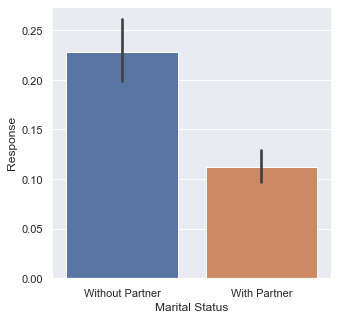

In [86]:
martial = sns.barplot(data=df_ecommerce, y='Response', x='Marital_Status')
sns.set(rc = {'figure.figsize':(5,8)})
martial.set_xlabel("Marital Status",fontsize=12)
martial.set_ylabel("Response",fontsize=12)
plt.show()

<AxesSubplot:xlabel='Kidhome', ylabel='Response'>

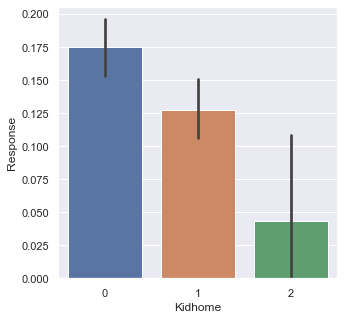

In [71]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(data=df_ecommerce, y='Response', x='Kidhome')

In [72]:
df_new['Teenhome'] = df_new['Teenhome'].replace([1, 2],'Yes')
df_new['Teenhome'] = df_new['Teenhome'].replace(0,'No')
df_new

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,income_bins,Income_bins
0,5524,1957,Graduation,Without Partner,58138.0,0,No,9/4/2012,58,635,...,0,0,0,0,3,11,1,65,40000-39999,40000-39999
1,2174,1954,Graduation,Without Partner,46344.0,1,Yes,3/8/2014,38,11,...,0,0,0,0,3,11,0,68,40000-39999,40000-39999
2,4141,1965,Graduation,With Partner,71613.0,0,No,8/21/2013,26,426,...,0,0,0,0,3,11,0,57,60000-79999,60000-79999
3,6182,1984,Graduation,With Partner,26646.0,1,No,2/10/2014,26,11,...,0,0,0,0,3,11,0,38,20000-39999,20000-39999
4,5324,1981,PhD,With Partner,58293.0,1,No,1/19/2014,94,173,...,0,0,0,0,3,11,0,41,40000-39999,40000-39999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,With Partner,61223.0,0,Yes,6/13/2013,46,709,...,0,0,0,0,3,11,0,55,60000-79999,60000-79999
2236,4001,1946,PhD,With Partner,64014.0,2,Yes,6/10/2014,56,406,...,0,1,0,0,3,11,0,76,60000-79999,60000-79999
2237,7270,1981,Graduation,Without Partner,56981.0,0,No,1/25/2014,91,908,...,0,0,0,0,3,11,0,41,40000-39999,40000-39999
2238,8235,1956,Master,With Partner,69245.0,0,Yes,1/24/2014,8,428,...,0,0,0,0,3,11,0,66,60000-79999,60000-79999


In [73]:
df_new.drop(columns = ['income_bins'], inplace=True)

<AxesSubplot:xlabel='Teenhome', ylabel='Response'>

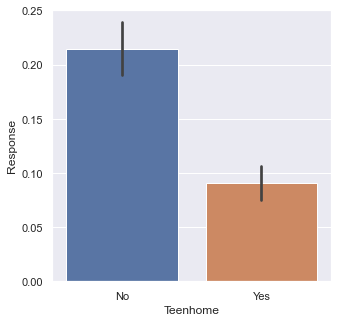

In [75]:
sns.barplot(data=df_ecommerce, y='Response', x='Teenhome')

In [100]:
df_new['Age_bins'] = pd.cut(x=df_new['Age'], bins=[0, 39, 49, 59, 69, 82], labels=['<40','40s','50s','60s','>=70'])
df_new

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Income_bins,Age_bins
0,5524,1957,Graduation,Without Partner,58138.0,0,No,9/4/2012,58,635,...,0,0,0,0,3,11,1,65,40000-39999,60s
1,2174,1954,Graduation,Without Partner,46344.0,1,Yes,3/8/2014,38,11,...,0,0,0,0,3,11,0,68,40000-39999,60s
2,4141,1965,Graduation,With Partner,71613.0,0,No,8/21/2013,26,426,...,0,0,0,0,3,11,0,57,60000-79999,50s
3,6182,1984,Graduation,With Partner,26646.0,1,No,2/10/2014,26,11,...,0,0,0,0,3,11,0,38,20000-39999,<40
4,5324,1981,PhD,With Partner,58293.0,1,No,1/19/2014,94,173,...,0,0,0,0,3,11,0,41,40000-39999,40s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,With Partner,61223.0,0,Yes,6/13/2013,46,709,...,0,0,0,0,3,11,0,55,60000-79999,50s
2236,4001,1946,PhD,With Partner,64014.0,2,Yes,6/10/2014,56,406,...,0,1,0,0,3,11,0,76,60000-79999,>=70
2237,7270,1981,Graduation,Without Partner,56981.0,0,No,1/25/2014,91,908,...,0,0,0,0,3,11,0,41,40000-39999,40s
2238,8235,1956,Master,With Partner,69245.0,0,Yes,1/24/2014,8,428,...,0,0,0,0,3,11,0,66,60000-79999,60s


In [99]:
df_new['Age'].max()

82

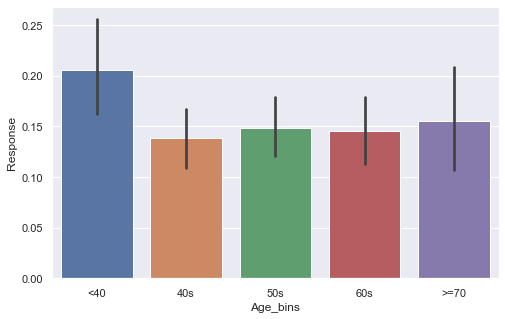

In [174]:
sns.barplot(data=df_ecommerce, y='Response', x='Age_bins')
sns.set(rc = {'figure.figsize':(8,5)})


<AxesSubplot:xlabel='Age_bins', ylabel='Response'>

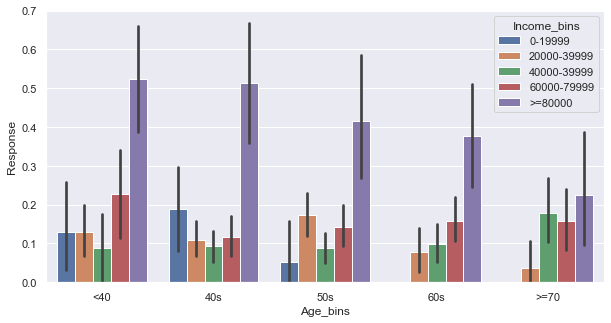

In [131]:
sns.barplot(data=df_ecommerce, y='Response', x='Age_bins', hue='Income_bins')

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='Response'>

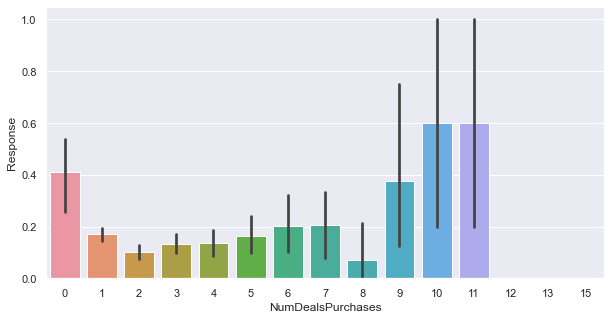

In [135]:
sns.barplot(data=df_ecommerce, y='Response', x='NumDealsPurchases')

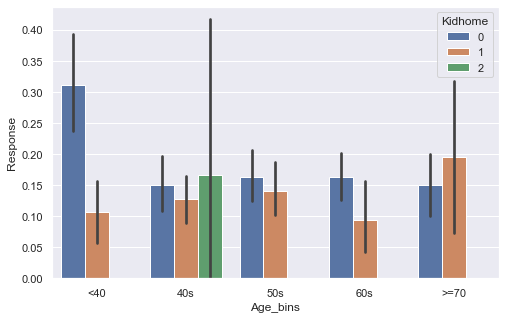

In [150]:
sns.barplot(data=df_ecommerce, y='Response', x='Age_bins', hue='Kidhome')
sns.set(rc = {'figure.figsize':(8,5)})


In [151]:
df_new['Kidhome'] = df_new['Kidhome'].replace([1, 2],'Yes')
df_new['Kidhome'] = df_new['Kidhome'].replace(0,'No')
df_new

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Income_bins,Age_bins
0,5524,1957,Graduation,Without Partner,58138.0,No,No,9/4/2012,58,635,...,0,0,0,0,3,11,1,65,40000-39999,60s
1,2174,1954,Graduation,Without Partner,46344.0,Yes,Yes,3/8/2014,38,11,...,0,0,0,0,3,11,0,68,40000-39999,60s
2,4141,1965,Graduation,With Partner,71613.0,No,No,8/21/2013,26,426,...,0,0,0,0,3,11,0,57,60000-79999,50s
3,6182,1984,Graduation,With Partner,26646.0,Yes,No,2/10/2014,26,11,...,0,0,0,0,3,11,0,38,20000-39999,<40
4,5324,1981,PhD,With Partner,58293.0,Yes,No,1/19/2014,94,173,...,0,0,0,0,3,11,0,41,40000-39999,40s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,With Partner,61223.0,No,Yes,6/13/2013,46,709,...,0,0,0,0,3,11,0,55,60000-79999,50s
2236,4001,1946,PhD,With Partner,64014.0,Yes,Yes,6/10/2014,56,406,...,0,1,0,0,3,11,0,76,60000-79999,>=70
2237,7270,1981,Graduation,Without Partner,56981.0,No,No,1/25/2014,91,908,...,0,0,0,0,3,11,0,41,40000-39999,40s
2238,8235,1956,Master,With Partner,69245.0,No,Yes,1/24/2014,8,428,...,0,0,0,0,3,11,0,66,60000-79999,60s


<AxesSubplot:xlabel='Age_bins', ylabel='Response'>

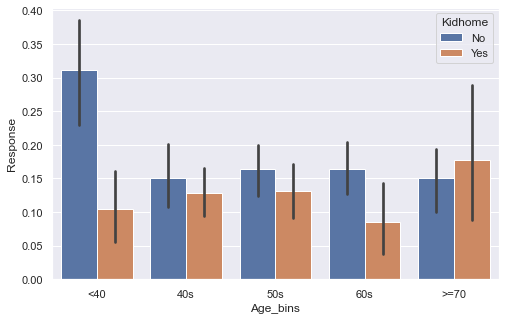

In [152]:
sns.barplot(data=df_ecommerce, y='Response', x='Age_bins', hue='Marital_Status')


<AxesSubplot:xlabel='Education', ylabel='Response'>

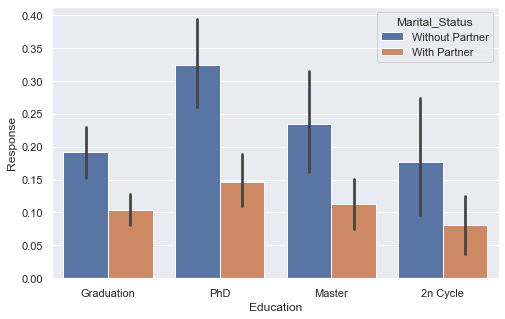

In [173]:
sns.barplot(data=df_ecommerce, y='Response', x='Education', hue='Marital_Status')


<AxesSubplot:xlabel='Age_bins', ylabel='Response'>

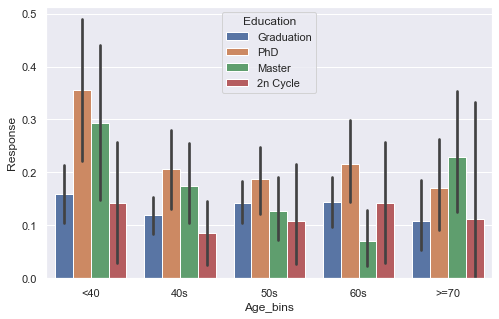

In [171]:
sns.barplot(data=df_ecommerce, y='Response', x='Age_bins',hue='Education')


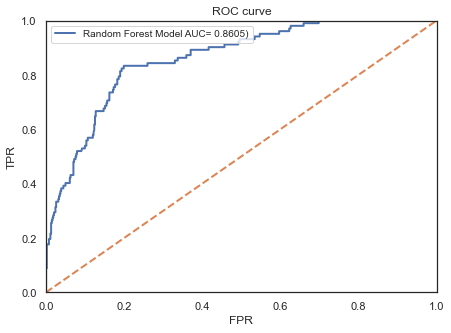

In [198]:
sns.set_theme(style="white")

plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.legend(["Random Forest Model AUC= {:.4f})".format(auc(fpr, tpr))],fontsize=10, loc=2)
plt.show()